In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv("../data/processed/churn_enum.csv")
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Partner,MultipleLines,StreamingMovies,DeviceProtection,SeniorCitizen,...,PaperlessBilling,OnlineSecurity,InternetService,TechSupport,PaymentMethod,PhoneService,Dependents,OnlineBackup,Contract,gender
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,...,1,1,0,0,1,1,0,1,1,1
2,3668-QPYBK,2,53.85,108.15,1,1,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,0,...,1,1,0,1,2,0,0,1,1,1
4,9237-HQITU,2,70.70,151.65,1,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [71]:
y = df["Churn"]
x = df.drop(columns=["Churn", "customerID"])

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [73]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
baseline_pred = lr.predict(x_test)
baseline_score = roc_auc_score(y_test, baseline_pred)

In [74]:
perm_imp_scores = {}
for col in x_test.columns:
    temp_x_test = x_test.copy()
    temp_x_test[col] = list(x_test[col].copy().sample(frac=1))
    running_list = []
    for _ in range(7):
        pred = lr.predict(temp_x_test)
        score = roc_auc_score(y_test, pred)
        running_list.append(score)
    avg_score = sum(running_list) / len(running_list)
    perm_imp_scores[col] = baseline_score - avg_score

In [75]:
pd.DataFrame(data = perm_imp_scores, index=[0])

,tenure,MonthlyCharges,TotalCharges,Partner,MultipleLines,StreamingMovies,DeviceProtection,SeniorCitizen,StreamingTV,PaperlessBilling,OnlineSecurity,InternetService,TechSupport,PaymentMethod,PhoneService,Dependents,OnlineBackup,Contract,gender
0,0.18255,0.024096,0.017742,-0.00073,-0.000348,-0.002189,0.007579,0.008508,-0.008889,0.026667,0.059736,0.013631,0.057066,0.010249,0.001874,0.001426,0.006832,0.090964,-0.000763


In [76]:
import plotly.graph_objects as go

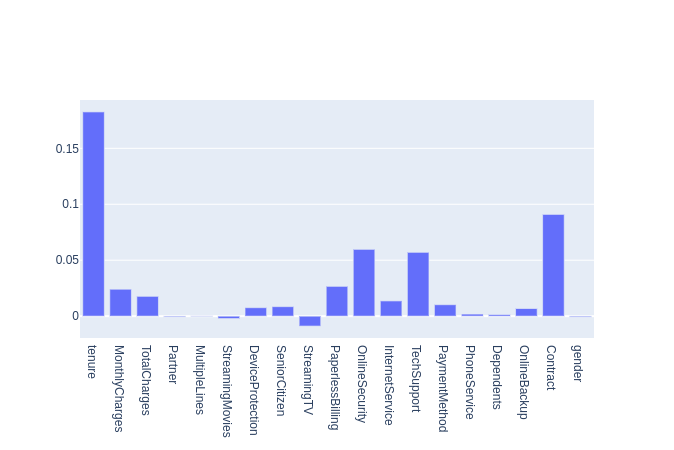

In [77]:
fig = go.Figure(data=go.Bar(y = list(perm_imp_scores.values()), 
                            x = list(perm_imp_scores.keys())))
fig.show()